World Wide Product Inc.

Changing the directory to the required dataset

In [4]:
cd Project5/

/Users/danaalmansour/Desktop/Project5


In [5]:
ls

Historical Product Demand.csv*


In [6]:
#importing all required libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder  
import numpy as np
import datetime as dt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [7]:
forecasts = pd.read_csv('Historical Product Demand.csv')# Loading Historical Product Demand.csv file

To look for the data types of various features

In [8]:
forecasts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


In [9]:
forecasts.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


The dataset above contains 5 columns: 'product_Code', 'WareHouse', 'Product_Category', 'Date' and 'Order_demand'.

In [10]:
# finding top demanding product by using describe command.
forecasts.describe()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1048575,1048575,1048575,1037336,1048575
unique,2160,4,33,1729,3828
top,Product_1359,Whse_J,Category_019,2013/9/27,1000
freq,16936,764447,481099,2075,112682


However, I want to see the highest order demand in decending to have a better insight. The results below show that Product_1359 has the highest Order Demand of 16936.

In [11]:
count = forecasts.groupby('Product_Code', as_index=False)['Order_Demand'].count() #calculate average rating
sort_count = count.sort_values(by=['Order_Demand'],ascending=False)
sort_count.head()

,Product_Code,Order_Demand
1348,Product_1359,16936
1284,Product_1295,10575
1367,Product_1378,9770
619,Product_0620,9428
1275,Product_1286,8888


I want to visualize the data distribution of month and year. I first convert 'Date' object to datatime and drop null values if it has any.

In [12]:
#Seperating month and year
forecasts['Date'] = pd.to_datetime(forecasts['Date'], errors='coerce')
forecasts['year'] = forecasts['Date'].dt.year 
forecasts['month'] = forecasts['Date'].dt.month
forecasts["Order_Demand"] = pd.to_numeric(forecasts["Order_Demand"], errors='coerce')
forecasts = forecasts.dropna()
forecasts.shape

(1031437, 7)

Since I won't need 'Warehouse' and 'Product_Category', they will be deleted.

In [13]:
#deleting unnecessary columns
del forecasts["Product_Category"]
del forecasts["Warehouse"]

In [14]:
forecasts.head()

,Product_Code,Date,Order_Demand,year,month
0,Product_0993,2012-07-27,100.0,2012.0,7.0
1,Product_0979,2012-01-19,500.0,2012.0,1.0
2,Product_0979,2012-02-03,500.0,2012.0,2.0
3,Product_0979,2012-02-09,500.0,2012.0,2.0
4,Product_0979,2012-03-02,500.0,2012.0,3.0


I also only want 'Product_1359' in my dataset. So, I will extract the rows that contain this product as weel as making a new table and name it'prod'. 

In [15]:
#choose only product_1359
prod = forecasts[forecasts.Product_Code == "Product_1359"]
print(prod.shape)

(16912, 5)


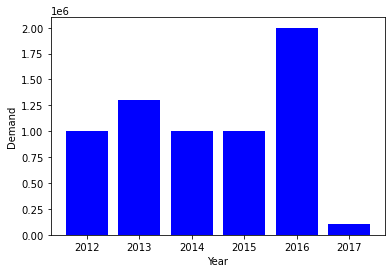

In [16]:
#plot for year
plt.bar(prod['year'], prod['Order_Demand'], color='blue')
plt.xlabel("Year")
plt.ylabel("Demand")
plt.show()

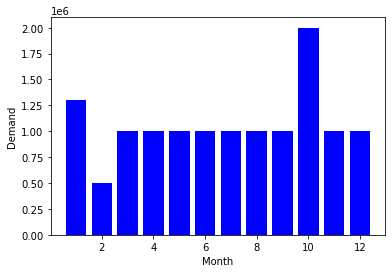

In [17]:
#plot for month
plt.bar(prod['month'], prod['Order_Demand'], color='blue')
plt.xlabel("Month")
plt.ylabel("Demand")
plt.show()

Both graphs show that product demands per month have more information than the year. It also appears that the demand is higher in the1st month and 10th-month, but bit's quite the same for the other months. Also, Demands in the 2nd month are the lowest.

In [18]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16912 entries, 276 to 1046518
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Product_Code  16912 non-null  object        
 1   Date          16912 non-null  datetime64[ns]
 2   Order_Demand  16912 non-null  float64       
 3   year          16912 non-null  float64       
 4   month         16912 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 792.8+ KB


I won't need "Product_Code" because it will be the same for all as we have only one product. I also won't need "year" and "month" since I won't require it. 

In [19]:
#deleting unnecessary columns
del prod["Product_Code"]
del prod["year"]
del prod["month"]

I want unique date, if there are multiple order on same date, I will sum that up.

In [20]:
prod = prod.groupby('Date', as_index=False)['Order_Demand'].sum() #group by date

In [21]:
prod.shape

(1232, 2)

In [22]:
prod['Order_Demand'].sum()
prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 0 to 1231
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1232 non-null   datetime64[ns]
 1   Order_Demand  1232 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.9 KB


I run following code in order tp  plot demand graph through out the period specified

In [23]:
prod.loc[:, 'Date'] = pd.to_datetime(prod.loc[:,'Date'], format="%Y-%m-%d")
#prod.loc[:, 'Date'] = prod.loc[:,'Date'], format="%Y/%m/%d"
prod = prod.set_index('Date')
prod.index
prod.head()

,Order_Demand
Date,
2012-01-05,702000.0
2012-01-06,676000.0
2012-01-10,783000.0
2012-01-11,200000.0
2012-01-12,284000.0


I will draw the plot for order demand distribution vs date. Then, I will plot demand distribution vs month.

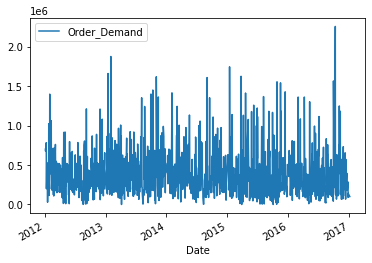

In [24]:
#ploting for date
prod.plot()
product_Month = prod["Order_Demand"].resample('MS').sum()
product_Month['2016':]
product_Month = product_Month.drop(pd.to_datetime('2017-01-01'))

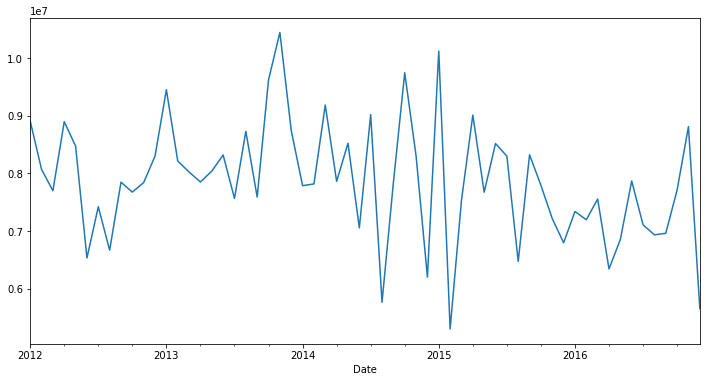

Date
2012-01-01    8910000.0
2012-02-01    8071000.0
2012-03-01    7700000.0
2012-04-01    8900000.0
2012-05-01    8475000.0
Freq: MS, Name: Order_Demand, dtype: float64

In [25]:
#ploting based on month
product_Month['2017':]
product_Month.plot(figsize=(12, 6))
plt.show()
product_Month.head()

Once again, the graph show that monthly distribution is better than date based.

Time Series Forecasting using ARIMA

I will first check the rolmean and stand deviation before applying any time forecasting algorithm on data.

In [26]:
rolmean = product_Month.rolling(window=12).mean()

In [27]:
rolstd = product_Month.rolling(window=12).std()

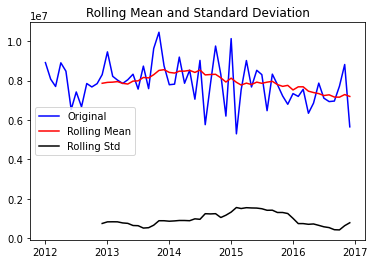

In [28]:
#plot rolling stastics
orig = plt.plot(product_Month, color="blue", label="Original")
mean = plt.plot(rolmean, color='red', label="Rolling Mean")
std = plt.plot(rolstd, color = 'black', label = "Rolling Std")
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show(block = False)

Since it looks costant, it is stationary. i will try with log version to make some improvment.

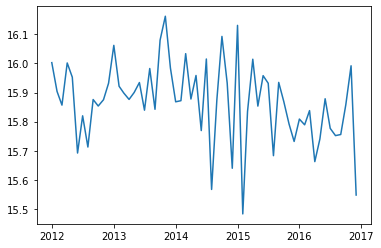

In [29]:
#Estimating Trend
import numpy as np
log_Scale = np.log(product_Month)
plt.plot(log_Scale)

In [30]:
rolmean = log_Scale.rolling(window=12).mean()
rolstd = log_Scale.rolling(window=12).std()

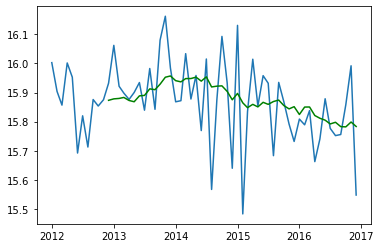

In [33]:
plt.plot(log_Scale)
plt.plot(rolmean, color="green")
#plt.plot(rolstd, color="black")

I don't see an effect of log scale. It is better to use original version

In [34]:
decomposition = seasonal_decompose(product_Month)

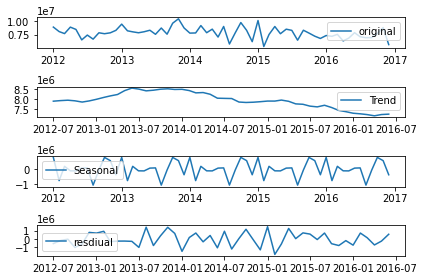

In [35]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(product_Month, label = "original")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(trend, label = "Trend")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(seasonal, label = "Seasonal")
plt.legend(loc="best")
plt.subplot(414)
plt.plot(residual, label = "resdiual")
plt.legend(loc="best")
plt.tight_layout()


decomposedLogData = residual
decomposedLogData.dropna(inplace=True)

I will first divide data into train and test and apply ARIMA model in order to see the performance in the data.

In [36]:
#spliting the data into test and train
from statsmodels.tsa.arima_model import ARIMA
train = product_Month[:'2015-12-31']
test = product_Month['2016-01-31':]
train = train.dropna()
test = test.dropna()

                              ARMA Model Results                              
Dep. Variable:           Order_Demand   No. Observations:                   48
Model:                     ARMA(0, 1)   Log Likelihood                -732.779
Method:                       css-mle   S.D. of innovations        1032089.632
Date:                Mon, 12 Oct 2020   AIC                           1471.557
Time:                        10:08:08   BIC                           1477.171
Sample:                    01-01-2012   HQIC                          1473.679
                         - 12-01-2015                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               8.024e+06   1.29e+05     62.000      0.000    7.77e+06    8.28e+06
ma.L1.Order_Demand    -0.1342      0.141     -0.953      0.341      -0.410       0.142
                    

<Figure size 720x720 with 0 Axes>

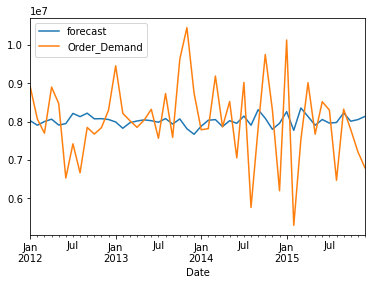

In [38]:
#define ARIMA model
# I have tried different value P, q are r. I was getting straight lines for other values.
model = ARIMA(train, order=(0,0,1))
prediction = model.fit()
print(prediction.summary())

plt.figure(figsize=(10,10))
prediction.plot_predict(dynamic=False)
plt.show()

the above figure show that the ARIMA isn't performing well.

In [48]:
forecasts, se, conf = prediction.forecast(11, alpha=0.09)

In [50]:
# converting to series
forecasts_series = pd.Series(forecast, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

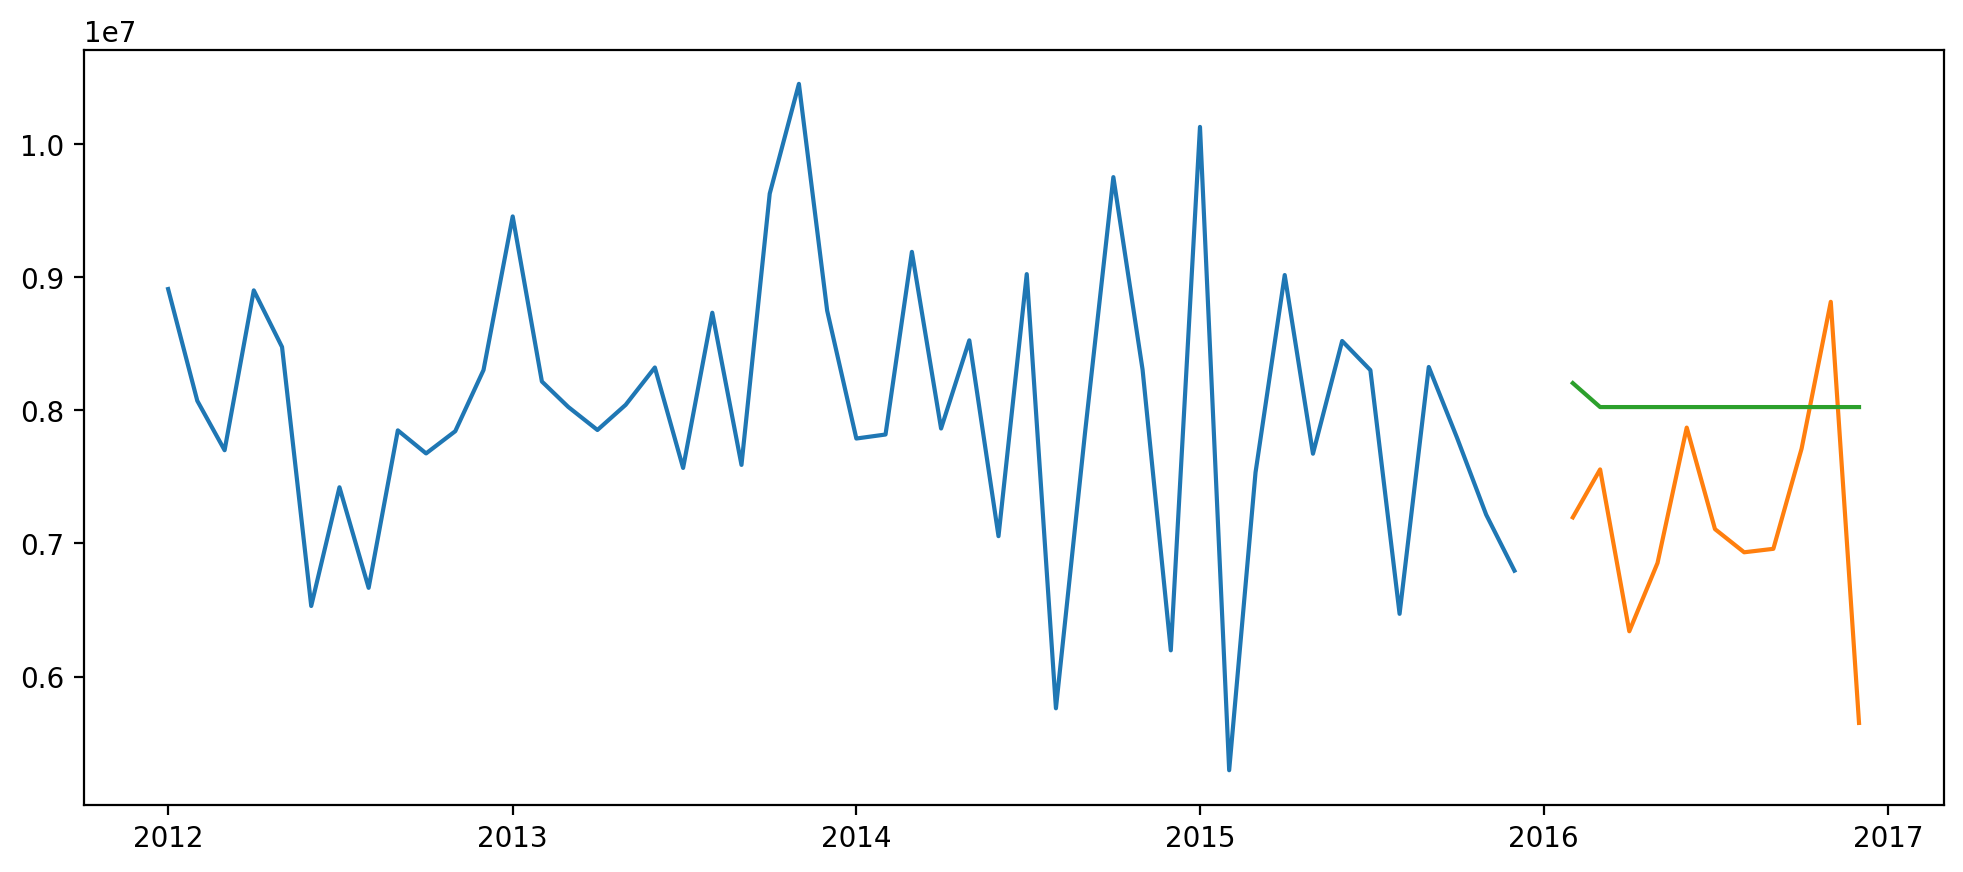

In [52]:
#visualization
plt.figure(figsize=(12,5), dpi=200)
plt.plot(train)
plt.plot(test)
plt.plot(forecasts_series)

plt.show()

Conclusion

I didn't quite understand this, but I think From the above experiment it look likes that performance is quite poor because of noisy data I think.